In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
df = pd.read_csv("C:/Users/Hp/Desktop/CODSOFT/TASK 1 Titanic Dataset Survival Prediction/Titanic-Dataset (1).csv")

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.shape

(891, 12)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df.drop(columns='Cabin',axis=1,inplace=True)

In [31]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [34]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [37]:
df['Fare'].fillna(df['Fare'].mode()[0],inplace=True)

In [38]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [41]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [42]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

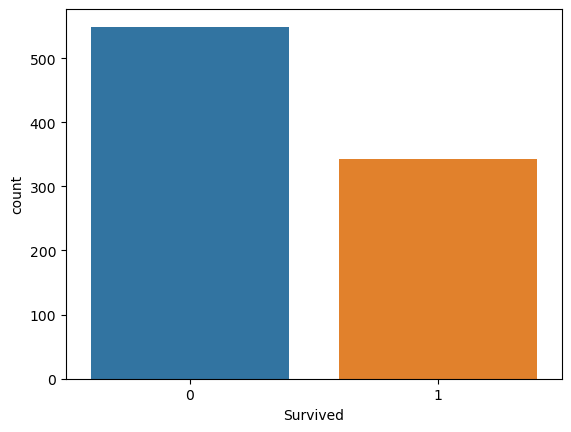

In [44]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Sex', ylabel='count'>

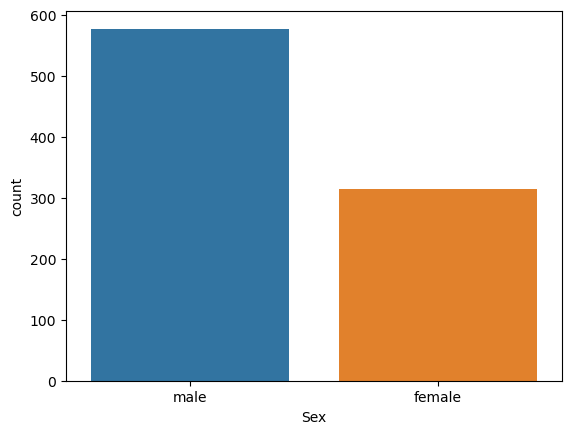

In [45]:
sns.countplot(x='Sex',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

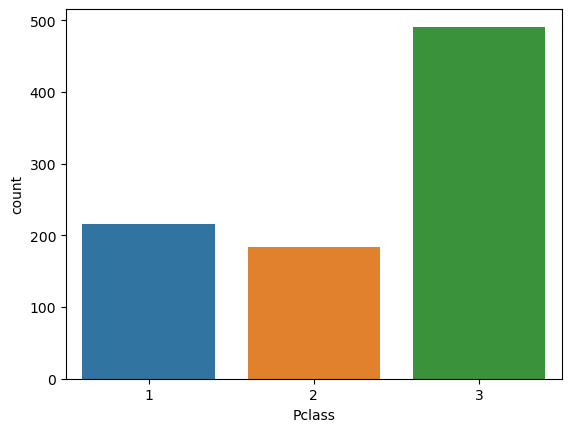

In [46]:
sns.countplot(x='Pclass',data=df)

In [53]:
df.groupby(['Sex','Survived'])['Sex'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

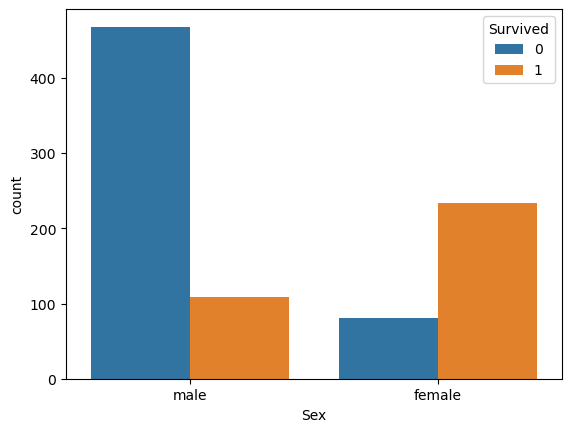

In [54]:
sns.countplot(x='Sex',data=df,hue='Survived')

In [57]:
df['Sex_encoded'] = df['Sex'].map({'male':0, 'female':1})

In [59]:
df['Embarked_encoded'] = df['Embarked'].map({'S':0,'C':1,'Q':2})

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_encoded,Embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0


In [70]:
x = df[['Survived','Pclass','Sex_encoded','Age','SibSp','Parch','Fare','Embarked_encoded']]
y = df['Survived']

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
print(x.shape,x_train.shape,x_test.shape)

(891, 8) (712, 8) (179, 8)


In [96]:
model = LogisticRegression()

In [97]:
lr = model.fit(x_train,y_train)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
x_train_prediction = model.predict(X_train)  
train_data_accuracy = accuracy_score(y_train, x_train_prediction)

In [102]:
print(x_train_prediction)

[0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1
 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 1 

In [100]:
x_train_prediction = model.predict(X_train)  
train_data_accuracy = accuracy_score(y_train, x_train_prediction) 

In [103]:
print(f'The Accuracy score of training data: {train_data_accuracy}')

The Accuracy score of training data: 1.0


In [104]:
x_test_prediction = model.predict(x_test)

In [105]:
print(x_test_prediction)

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]


In [106]:
test_data_accuracy = accuracy_score(y_test,x_test_prediction)

In [107]:
print(f'The Accuracy score of testing data: {test_data_accuracy}')

The Accuracy score of testing data: 1.0


In [112]:
# Selecting SVM model 

final_result = pd.DataFrame(model.predict(x), columns=["Titanic_Survived_Prediction"])
final_result

,Titanic_Survived_Prediction
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [114]:
final_model = pd.concat([(df.drop(['Survived'], axis = 1)), df['Survived'], pd.DataFrame(final_result)], axis = 1)
final_model

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_encoded,Embarked_encoded,Survived,Titanic_Survived_Prediction
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,1,1,1
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,0,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,0,1,1
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,0,0,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,0,1,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,1,0,0,0
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,1,1,1


In [115]:
final_model.to_csv(r"C:\Users\Hp\Desktop\CODSOFT\TASK 1 Titanic Dataset Survival Prediction\Titanic_Dataset_Survival_Prediction.csv")

In [116]:
print("Final Accuracy Score:",accuracy_score(final_model['Survived'], final_model['Titanic_Survived_Prediction']))

Final Accuracy Score: 1.0
